# Run Correlation-Based Analyses

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a correlation between a dependent variable and an independent variable is statistically significant using permutation analysis. 

Further, follow this up with a contrast analysis which sees which categorical variables have significantly different correlations from each other. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [19]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/05c_Howard_MetaAlzheimerReview_DBS-TMS_Coordinates/metadata/comparison_data.xlsx'
sheet = "Sheet1" #'master_list_proper_subjects' 

In [ ]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/supplement_syst_review_ad_cognition_specificity'

In [21]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [22]:
data_df.columns

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Sham_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_',
       'Active_AD_Treatment_Proportion', 'Diagnosis', 'Diagnostic_Criteria',
       'Stim_Type', 'Frequency', 'Intensity', 'Navigation',
       'Total_Pulses_session', 'session', 'Total_pulses',
       'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D', 'Redo_test',
       'cohens_D_redo', 'Verbal_Memory_Test', 'Memory_Cohen_s_D',
       'Stimulation_site', 'Stim_Coordinate', 'Included', 'Exclusion_Reason',
       'roi_path', 'roi_path_old', 'subject', 'CNM_Damage_Roi_old',
       'CNM_Damage_Roi_new',
       'Memory_Network_T_Values__Ferguson_2019__average_target_in_subject',
       'Default_average_target_in_subject', 'overlap_values', 'region',
       'outcome'],
      dtype='object')

In [24]:
drop_list = ['overlap_values', 'region', 'outcome']

In [25]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,Study,DOI,RCT_Design,Age_range,CDR,Active_N,Sham_N,Mean_Age,Active_Age,Sham_Age,...,roi_path,roi_path_old,subject,CNM_Damage_Roi_old,CNM_Damage_Roi_new,Memory_Network_T_Values__Ferguson_2019__average_target_in_subject,Default_average_target_in_subject,overlap_values,region,outcome
3,"Cotelli et al., 2011",10.1136/jnnp.2009.197848,Parallel,NaN,NaN,5.0,5.0,71.0,71.2 ± 6.1,74.4 ± 3.8,...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Cotelli_et_al___2011,-0.510,0.410,11.015794,0.519860,-5.100000e-01,convergent,-0.087051
4,"Hu et al., 2022",10.1016/j.brs.2022.11.009,Parallel,60–90,2,21.0,21.0,76.0,76.86 ± 6.07,75.33 ± 5.73,...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Hu_et_al___2022,0.370,0.370,-9.677328,0.502714,3.700000e-01,convergent,0.467755
5,"Jia et al., 2021",10.3389/fnagi.2021.693611,Parallel,55–85,0.5–2,35.0,34.0,71.0,71.41 ± 8.85,73.41 ± 7.73,...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Jia_et_al___2021,0.605,0.610,27.345877,0.781328,6.050000e-01,convergent,0.143098
6,"Jung et al., 2025",10.1001/jamanetworkopen.2024.9220,Parallel,55-90,0.5-2,18.0,12.0,69.0,69.8 ± 9.1,69.8 ± 9.1,...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Jung_et_al___2025,0.602,0.605,25.487710,0.809380,6.020000e-01,convergent,0.481701
7,"Koch et al., 2018",https://doi.org/10.1016/j.neuroimage.2017.12.048,NaN,>65,0.5–1,14.0,NaN,70.0,70 ± 5.1,NaN,...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2018,0.540,0.540,27.136862,0.392448,5.400000e-01,convergent,-0.240424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,hpc,0.475974
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,hpc,-0.648650
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,hpc,0.500000
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.347402e-47,hpc,0.659296


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [26]:
data_df.columns
# data_df.City.unique()

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Sham_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_',
       'Active_AD_Treatment_Proportion', 'Diagnosis', 'Diagnostic_Criteria',
       'Stim_Type', 'Frequency', 'Intensity', 'Navigation',
       'Total_Pulses_session', 'session', 'Total_pulses',
       'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D', 'Redo_test',
       'cohens_D_redo', 'Verbal_Memory_Test', 'Memory_Cohen_s_D',
       'Stimulation_site', 'Stim_Coordinate', 'Included', 'Exclusion_Reason',
       'roi_path', 'roi_path_old', 'subject', 'CNM_Damage_Roi_old',
       'CNM_Damage_Roi_new',
       'Memory_Network_T_Values__Ferguson_2019__average_target_in_subject',
       'Default_average_target_in_subject', 'overlap_values', 'region',
       'outcome'],
      dtype='object')

In [13]:
column = 'Cognitive_Test'  # The column you'd like to evaluate
condition = 'equal'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 'UPDRS-1' # The value to compare against

In [14]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,Study,DOI,RCT_Design,Age_range,CDR,Active_N,Sham_N,Mean_Age,Active_Age,Sham_Age,...,Exclusion_Reason,roi_path,roi_path_old,subject,CNM_Damage_Roi_old,CNM_Damage_Roi_new,Memory_Network_T_Values__Ferguson_2019__average_target_in_subject,Default_average_target_in_subject,Memory_average_target_in_subject,hippocampus_2mm_average_target_in_subject
3,"Cotelli et al., 2011",10.1136/jnnp.2009.197848,Parallel,NaN,NaN,5.0,5.0,71.0,71.2 ± 6.1,74.4 ± 3.8,...,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Cotelli_et_al___2011,-0.510000,0.410000,11.015794,0.519860,0.272607,0.000000e+00
4,"Hu et al., 2022",10.1016/j.brs.2022.11.009,Parallel,60–90,2,21.0,21.0,76.0,76.86 ± 6.07,75.33 ± 5.73,...,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Hu_et_al___2022,0.370000,0.370000,-9.677328,0.502714,0.158448,0.000000e+00
5,"Jia et al., 2021",10.3389/fnagi.2021.693611,Parallel,55–85,0.5–2,35.0,34.0,71.0,71.41 ± 8.85,73.41 ± 7.73,...,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Jia_et_al___2021,0.605000,0.610000,27.345877,0.781328,1.602811,0.000000e+00
6,"Jung et al., 2025",10.1001/jamanetworkopen.2024.9220,Parallel,55-90,0.5-2,18.0,12.0,69.0,69.8 ± 9.1,69.8 ± 9.1,...,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Jung_et_al___2025,0.602000,0.605000,25.487710,0.809380,0.818703,0.000000e+00
7,"Koch et al., 2018",https://doi.org/10.1016/j.neuroimage.2017.12.048,NaN,>65,0.5–1,14.0,NaN,70.0,70 ± 5.1,NaN,...,Duplicated,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2018,0.540000,0.540000,27.136862,0.392448,1.094395,0.000000e+00
8,"Koch et al., 2022",10.1093/brain/awac285,Parallel,50–85,0.5–1,25.0,25.0,75.0,75 ± 5.6,72.3 ± 7.2,...,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2022,0.545000,0.545000,27.136862,0.392448,1.094395,0.000000e+00
9,"Koch et al., 2025",10.1186/s13195-025-01709-7,Parallel,57-90,0.5–1,27.0,21.0,74.0,74 ± 5.1,71.2 ± 5.11,...,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Koch_et_al___2025,0.550000,0.550000,27.136862,0.392448,1.094395,0.000000e+00
10,"Kuhn et al., 2015",https://doi.org/10.1038/mp.2014.32,Crossover,57-90,<0.5,6.0,NaN,69.0,69.5 ± 7.7,NaN,...,no sham arm,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Kuhn_et_al___2015,0.045051,0.451000,26.952164,-0.002823,0.071100,-5.532791e-22
11,"Li et al., 2021",10.1016/j.brs.2021.01.012,Parallel,NaN,NaN,37.0,38.0,65.0,65.97 ± 8.47,64.58 ± 7.88,...,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Li_et_al___2021,-0.615157,-0.620000,-28.178909,-0.277779,0.000000,0.000000e+00
12,"Liu et al., 2022",10.1093/cercor/bhab371,Parallel,50–85,0.5–1,25.0,12.0,67.0,67.28 ± 7.74,72.08 ± 7.3,...,NaN,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,/Volumes/HowExp/datasets/05c_Howard_MetaAlzhei...,Liu_et_al___2022,0.210017,0.215000,-19.884406,0.467410,0.000000,0.000000e+00


Regress out a Covariate

In [ ]:
lis = []
for col in data_df.columns:
    if 'surface' in col.lower():
        lis.append(col)
print(lis)

In [ ]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# use this code block to regress out covariates. Generally better to just include as covariates in a model..
dependent_variable_list = lis
regressors = ['Age', 'Sex']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [27]:
data_df.columns

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Sham_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_',
       'Active_AD_Treatment_Proportion', 'Diagnosis', 'Diagnostic_Criteria',
       'Stim_Type', 'Frequency', 'Intensity', 'Navigation',
       'Total_Pulses_session', 'session', 'Total_pulses',
       'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D', 'Redo_test',
       'cohens_D_redo', 'Verbal_Memory_Test', 'Memory_Cohen_s_D',
       'Stimulation_site', 'Stim_Coordinate', 'Included', 'Exclusion_Reason',
       'roi_path', 'roi_path_old', 'subject', 'CNM_Damage_Roi_old',
       'CNM_Damage_Roi_new',
       'Memory_Network_T_Values__Ferguson_2019__average_target_in_subject',
       'Default_average_target_in_subject', 'overlap_values', 'region',
       'outcome'],
      dtype='object')

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Cohort', 'Age', 'Z_Scored_Percent_Cognitive_Improvement', 'MinMaxNormBaseline_Higher_is_Better']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

In [ ]:
data_df.describe()

# 05 - Delta Scatterplot (Pretty)
- Generates 2 categories to compare by splitting on a continuous variable

In [28]:
data_df.columns

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Sham_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_',
       'Active_AD_Treatment_Proportion', 'Diagnosis', 'Diagnostic_Criteria',
       'Stim_Type', 'Frequency', 'Intensity', 'Navigation',
       'Total_Pulses_session', 'session', 'Total_pulses',
       'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D', 'Redo_test',
       'cohens_D_redo', 'Verbal_Memory_Test', 'Memory_Cohen_s_D',
       'Stimulation_site', 'Stim_Coordinate', 'Included', 'Exclusion_Reason',
       'roi_path', 'roi_path_old', 'subject', 'CNM_Damage_Roi_old',
       'CNM_Damage_Roi_new',
       'Memory_Network_T_Values__Ferguson_2019__average_target_in_subject',
       'Default_average_target_in_subject', 'overlap_values', 'region',
       'outcome'],
      dtype='object')

Data To Plot

In [29]:
# Data Variables
dependent_variable = 'outcome'
independent_variable = 'overlap_values'
group_variable = 'region' # This is the column which contains the values you are going to split the data by 

Labels for Plot

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from itertools import combinations

class DeltaCorrelationAnalysis:
    """Multigroup Pearson-r analysis with bootstraps, permutations, and plots."""

    # ---------- basic ----------
    def __init__(self, df: pd.DataFrame):
        self.df = df.copy(deep=False)
        self.boot_corrs: dict[str, np.ndarray] = {}
        self.perm_results: dict[tuple[str, str], tuple[float, float]] = {}

    # ---------- statistics ----------
    @staticmethod
    def _analytic_ci(x, y, x_grid):
        slope, intercept = np.polyfit(x, y, 1)
        y_fit = slope * x_grid + intercept

        resid = y - (slope * x + intercept)
        stderr = np.sqrt(resid.dot(resid) / (len(y) - 2))
        t_val = t.ppf(0.975, len(y) - 2)
        ci = t_val * stderr * np.sqrt(
            1 / len(x) + (x_grid - x.mean()) ** 2 / ((x - x.mean()) ** 2).sum()
        )
        return y_fit - ci, y_fit, y_fit + ci
    
    def bootstrap_correlations(self, x, y, group, n=1000, seed=None):
        rng = np.random.default_rng(seed)
        for g, sub in self.df.groupby(group):
            print(f"Group '{g}' has {len(sub)} values.")
            r = np.empty(n)
            for i in range(n):
                boot = sub.sample(len(sub), replace=True, random_state=rng.integers(2**32))
                r[i] = boot[x].corr(boot[y])
            self.boot_corrs[g] = r
        return self.boot_corrs

    def permute_delta_r(self, x, y, group, pairs=None, n=10000, seed=None):
        if pairs is None:
            pairs = combinations(self.df[group].unique(), 2)
        rng = np.random.default_rng(seed)

        for a, b in pairs:
            sub_a = self.df[self.df[group] == a]
            sub_b = self.df[self.df[group] == b]
            n_a, n_b = len(sub_a), len(sub_b)

            obs = sub_a[x].corr(sub_a[y]) - sub_b[x].corr(sub_b[y])

            joined = pd.concat([sub_a, sub_b], ignore_index=True)
            diffs = np.empty(n)
            for i in range(n):
                shuffle = rng.permutation(n_a + n_b)
                pa = joined.iloc[shuffle[:n_a]]
                pb = joined.iloc[shuffle[n_a:]]
                diffs[i] = pa[x].corr(pa[y]) - pb[x].corr(pb[y])
            p_val = (np.abs(diffs) >= abs(obs)).mean()
            self.perm_results[(a, b)] = (obs, p_val)

        return self.perm_results

    # ---------- plotting ----------
    def scatter(self, x, y, group, palette="tab10", alpha=.3, figsize=(4, 5), point_hue=None, point_palette="tab20"):
        plt.rcParams.update({'font.family': 'Helvetica', 'font.size': 16})  # Set font to Helvetica 16
        fig, ax = plt.subplots(figsize=figsize)
        if point_hue is None:
            hue_vals = sorted(self.df[group].dropna().unique())
            hue_cols = sns.color_palette(palette, len(hue_vals))
            colour_map = dict(zip(hue_vals, hue_cols))

            for g, col in colour_map.items():
                sub = self.df[self.df[group] == g]
                ax.scatter(sub[x], sub[y], color=col, s=20, alpha=alpha, label=g)
        else:
            hue_vals = sorted(self.df[point_hue].dropna().unique())
            hue_cols = sns.color_palette(point_palette, len(hue_vals))
            colour_map = dict(zip(hue_vals, hue_cols))

            for h in hue_vals:
                sub = self.df[self.df[point_hue] == h]
                ax.scatter(sub[x], sub[y], color=colour_map[h], s=20, alpha=alpha, label=str(h), edgecolors="none")

        # ------------ 2) regression lines per GROUP -------------------
        grp_vals = sorted(self.df[group].dropna().unique())
        line_cols = sns.color_palette(palette, len(grp_vals))
        x_grid = np.linspace(self.df[x].min(), self.df[x].max(), 400)

        for g, col in zip(grp_vals, line_cols):
            sub = self.df[self.df[group] == g]
            y_lo, y_fit, y_hi = self._analytic_ci(sub[x], sub[y], x_grid)
            ax.plot(x_grid, y_fit, color=col, linewidth=2.0, label=f"fit {g}")
            ax.fill_between(x_grid, y_lo, y_hi, color=col, alpha=alpha / 4)

        # ------------ 3) permutation text (if already computed) -------
        if self.perm_results:
            txt = "\n".join(
                f"{a}–{b}: Δr={d:.2f}, p={p:.3f}"
                for (a, b), (d, p) in self.perm_results.items()
            )
            ax.set_title(txt, fontsize=9)

        ax.set_xlabel(x)
        ax.set_ylabel(y)
        sns.despine(ax=ax)
        ax.legend(frameon=False)
        return fig

    # ---------- plotting ----------
    def boxplot_boot(self, x: str, y: str, group: str, *,
        xlim=(-1, 1), horiz: bool = True, figsize=(4, 4), out_path: str | None = None):
        """
        Box-plots of bootstrapped Pearson-r per group with observed r over-laid.
        Call `bootstrap_correlations` first (or `run`).

        Parameters
        ----------
        x, y        : column names whose correlation is analysed.
        group       : column name used to split the data.
        xlim        : limits for the correlation axis.
        horiz       : plot horizontally (True) or vertically (False).
        """
        if not self.boot_corrs:
            raise RuntimeError("Run bootstrap_correlations (or run) first.")

        # long-form DF for Seaborn
        df_long = (pd.DataFrame(self.boot_corrs).melt(var_name="Group", value_name="r").dropna())

        fig = plt.figure(figsize=figsize)
        orient = "h" if horiz else "v"

        if horiz:
            sns.boxplot( data=df_long,  x="r", y="Group", orient=orient, palette="coolwarm")
            plt.xlim(*xlim)
            plt.xlabel("Pearson r")
            plt.ylabel(group)
        else:
            sns.boxplot(data=df_long,x="Group",y="r",orient=orient,palette="coolwarm")
            plt.ylim(*xlim)
            plt.ylabel("Pearson r")
            plt.xlabel(group)
        plt.legend(frameon=False)
        sns.despine()

        if out_path:
            fig.savefig(out_path, bbox_inches="tight")
        return fig
    
    # ---------- orchestration function ----------
    def run(self, x: str, y: str, group: str, n_boot: int = 1000, n_perm: int = 10000,
        palette: str = "tab10", alpha: float = 1, xlim: tuple[float, float] = (-1, 1),
        horiz_box: bool = True, out_dir: str | None = None,  seed: int | None = None, figsize=(4, 4.5),
        point_hue: str | None = None, point_palette: str = "tab20"):
        """
        One-liner entry: does bootstraps, permutations, scatter & box-plot.
        """
        # Print the number of unique values in the group
        unique_groups = self.df[group].nunique()
        print(f"Number of unique groups in '{group}': {unique_groups}")
        # 1) statistics
        self.bootstrap_correlations(x, y, group, n=n_boot, seed=seed)
        self.permute_delta_r(x, y, group, n=n_perm, seed=seed)

        # 2) figures
        sc_fig = self.scatter(x, y, group, palette=palette, alpha=alpha, figsize=figsize, point_hue=point_hue, point_palette=point_palette)
        bx_fig = self.boxplot_boot(x, y, group, xlim=xlim, horiz=horiz_box, figsize=figsize)

        # 3) save, if requested
        if out_dir:
            sc_fig.savefig(f"{out_dir}/scatter.svg", bbox_inches="tight")
            bx_fig.savefig(f"{out_dir}/boot_box.svg", bbox_inches="tight")

        return sc_fig, bx_fig


Number of unique groups in 'region': 3
Group 'convergent' has 22 values.
Group 'default' has 25 values.
Group 'hpc' has 25 values.


/Users/cu135/Software_Local/calvin_utils_project/.venv_calvin/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/cu135/Software_Local/calvin_utils_project/.venv_calvin/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 288x324 with 1 Axes>, <Figure size 288x324 with 1 Axes>)

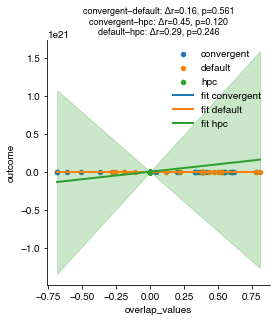

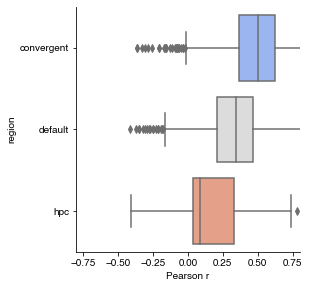

In [31]:
swc = DeltaCorrelationAnalysis(data_df)
swc.run(x=independent_variable, y=dependent_variable, group=group_variable, xlim=(-.8, .8), 
        out_dir=out_dir)